# GPU Log Datas

Dikarenakan data pada GPU menggunakan format .csv, maka visualisasi data akan ditampilkan disini

# Preparation

### Packages Installation

In [1]:
! pip install pandas
! pip install scikit-learn
! pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as scp

### Helper functions

In [3]:
def describe_total(table, gpu_num):
    total_rows, total_attributes = table.shape
    for i in range(0, gpu_num):
        print("GPU: ", i)
        print('Jumlah data:', total_rows//gpu_num)
        print("Jumlah atribut:", total_attributes)
        print()

def describe_numeric_column(table, gpu_num):
    for k in range(0, gpu_num):
        print("GPU: ", k)
        table_dup = table
        table_cutted = table_dup.loc[[(j % gpu_num) == k for j in range(0, table.shape[0])] , :]
        print(table_cutted.shape)
        fig_table = plt.figure(figsize=(12,4))
        fig_plot = plt.figure(figsize=(18,15))

        fig_table.tight_layout()
        idx = 0
        for i in table_cutted.columns:
            if table_cutted[i].dtype == 'int64' :
                idx += 1
                show_numeric_columninfos(table_cutted['timestamp'], table_cutted[i], idx, fig_table, fig_plot)
            elif table_cutted[i].dtype == "object" and 'MiB' in i:
                idx += 1
                int_df = table_cutted[i].str.rstrip(' MiB').astype('int')
                show_numeric_columninfos(table_cutted['timestamp'], int_df, idx, fig_table, fig_plot)
            elif "%" in i:
                idx += 1
                float_df = table_cutted[i].str.rstrip('%').astype('float')
                show_numeric_columninfos(table_cutted['timestamp'], float_df, idx, fig_table, fig_plot)
        print()

def show_numeric_columninfos(time, selected_data, index, fig_table, fig_plot):
    show_table(selected_data, index, fig_table)
    show_plot(time, selected_data, index, fig_plot)

def show_table(selected_data, index, plt):
    stats = [
        ['Mean', np.mean(selected_data)],
        ['Median', np.median(selected_data)],
        ['Mode', scp.mode(selected_data, keepdims=True)[0][0]],
        ['Minimum', np.min(selected_data)],
        ['Maximum', np.max(selected_data)],
    ]
    column_infos = pd.DataFrame(stats, columns=['Measure', 'Value'])
    
    ax = plt.add_subplot(2, 3, index)
    ax.text(0.3, 0.88, selected_data.name)
    ax.table(cellText = column_infos.values, rowLabels = column_infos.index, colLabels = column_infos.columns, loc='top')
    # ax.set_title(selected_data.name)
    # ax.legend([selected_data.name])
    ax.axis('off')
    
def show_plot(time, selected_data, index, plt):
    ax = plt.add_subplot(2, 3, index)
    ax.set_title(selected_data.name)
    ax.plot(time, selected_data)
    ax.set_xticks("")
    ax.set_xlabel('Time')
    ax.set_ylabel(selected_data.name)

# Scheduling Test

## FCFS (Burst)

### Training

In [3]:
# Read file
df = pd.read_csv('../data/dgx-fcfs-burst.csv')

# Describe general info
describe_total(df, 8)


GPU:  0
Jumlah data: 483
Jumlah atribut: 9

GPU:  1
Jumlah data: 483
Jumlah atribut: 9

GPU:  2
Jumlah data: 483
Jumlah atribut: 9

GPU:  3
Jumlah data: 483
Jumlah atribut: 9

GPU:  4
Jumlah data: 483
Jumlah atribut: 9

GPU:  5
Jumlah data: 483
Jumlah atribut: 9

GPU:  6
Jumlah data: 483
Jumlah atribut: 9

GPU:  7
Jumlah data: 483
Jumlah atribut: 9



GPU:  0
(483, 9)

GPU:  1
(483, 9)

GPU:  2
(483, 9)

GPU:  3
(483, 9)

GPU:  4
(483, 9)

GPU:  5
(483, 9)

GPU:  6
(483, 9)

GPU:  7
(483, 9)



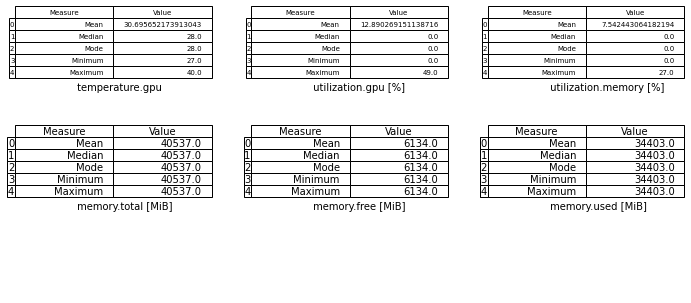

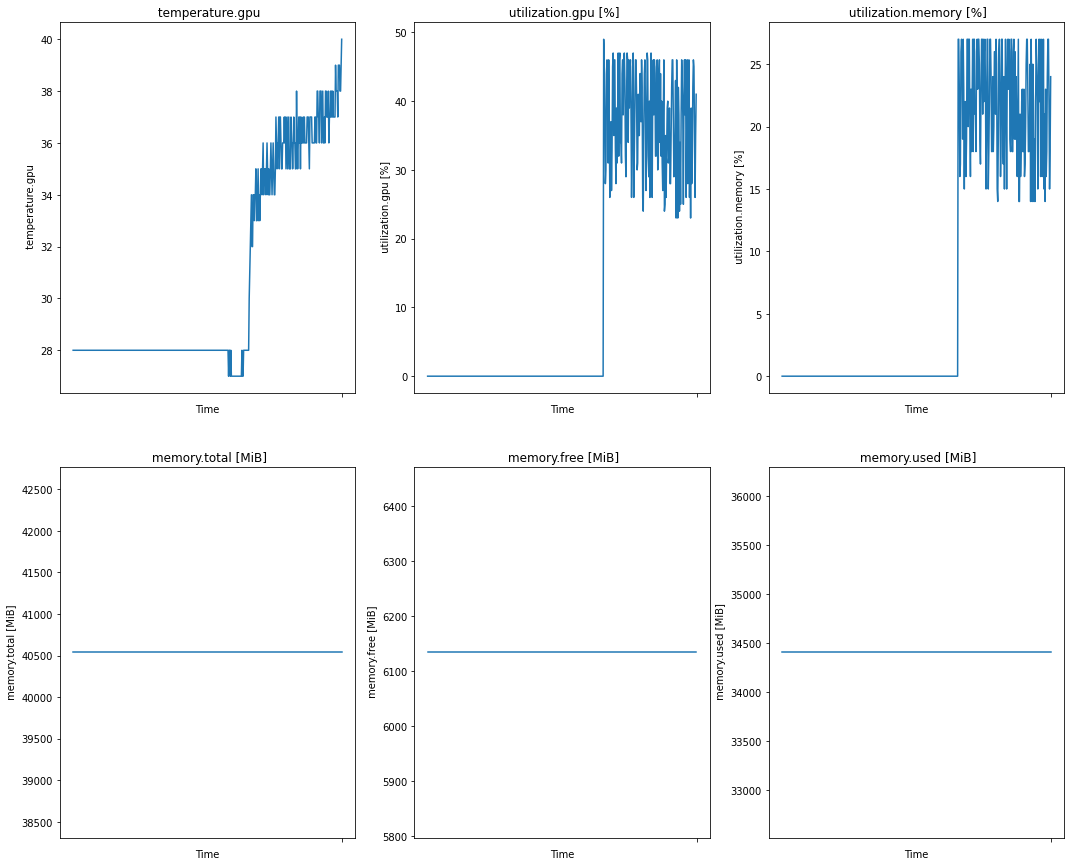

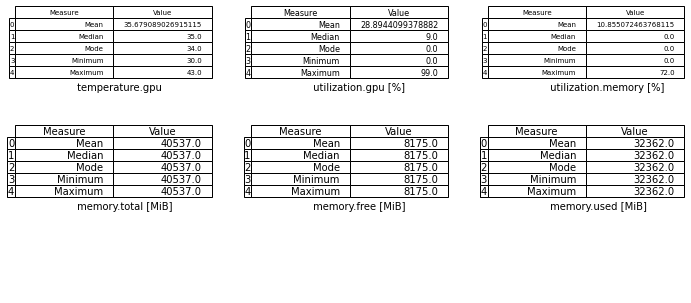

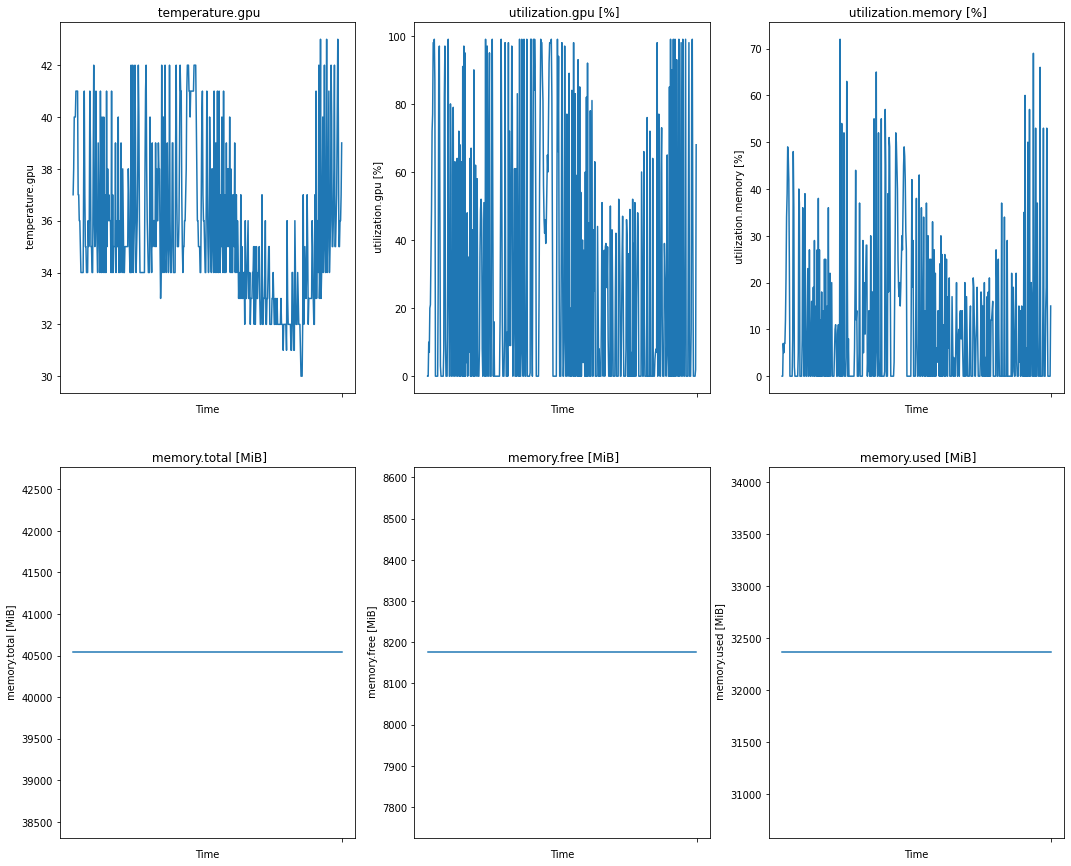

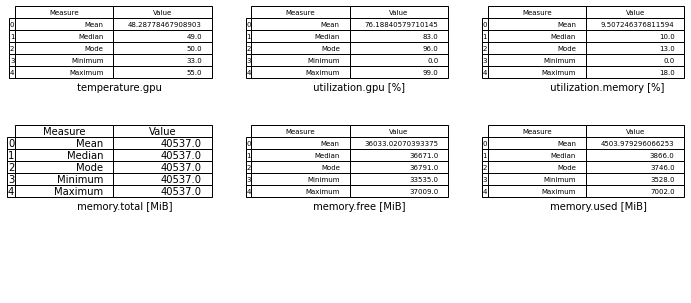

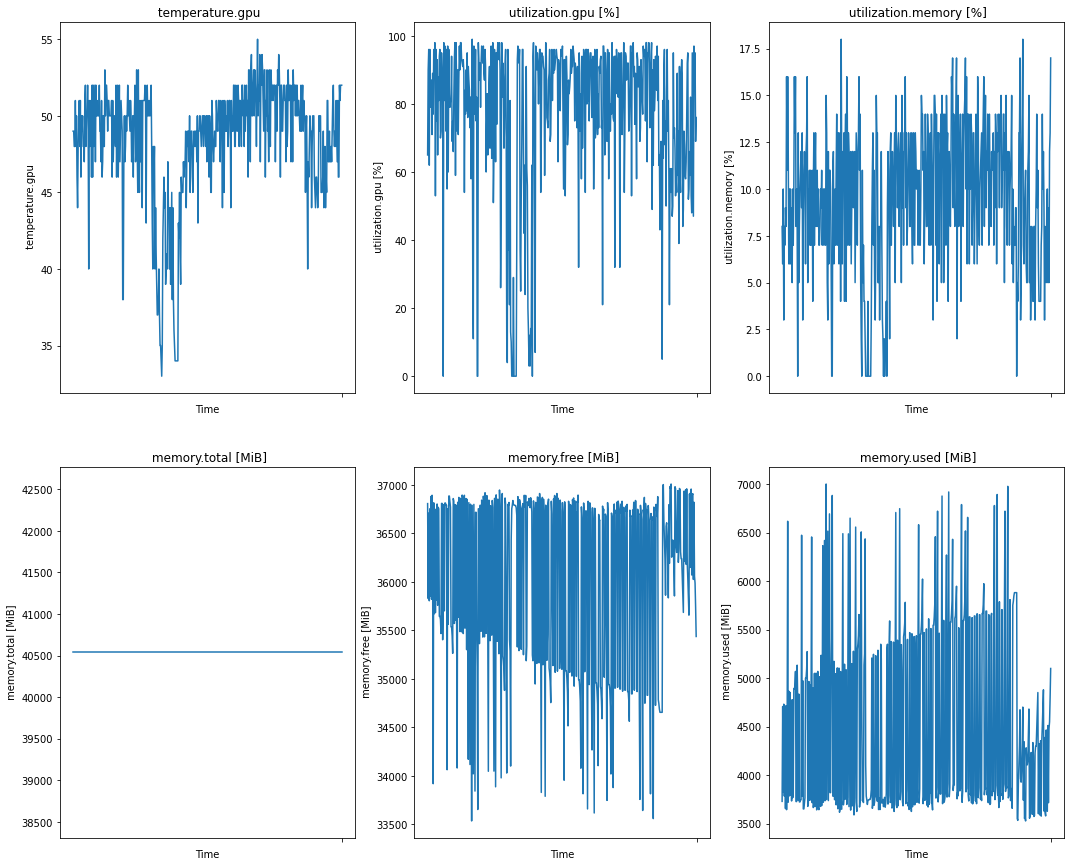

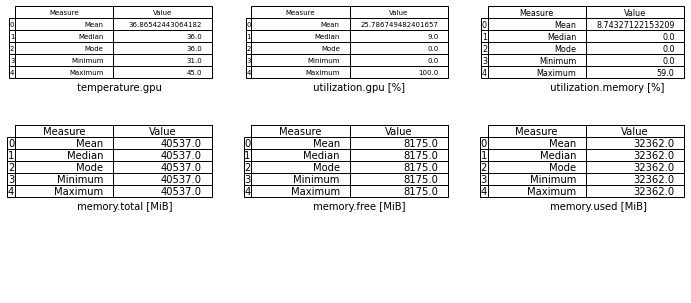

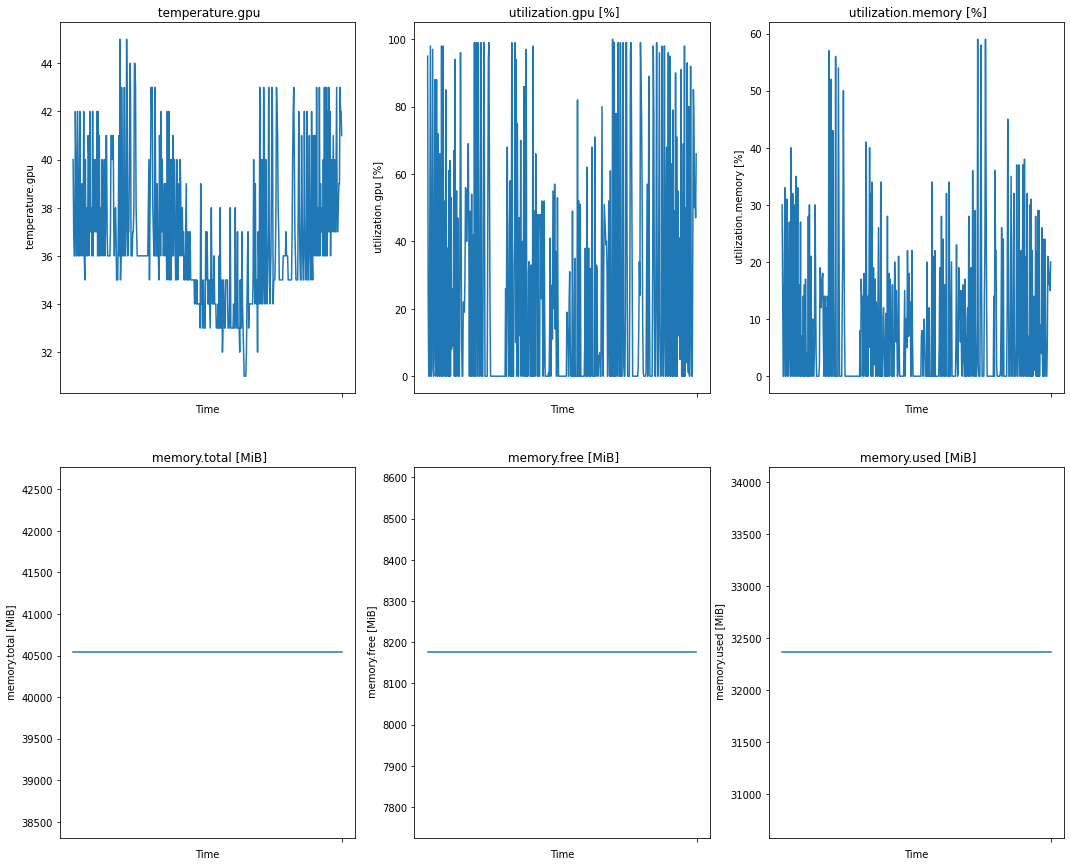

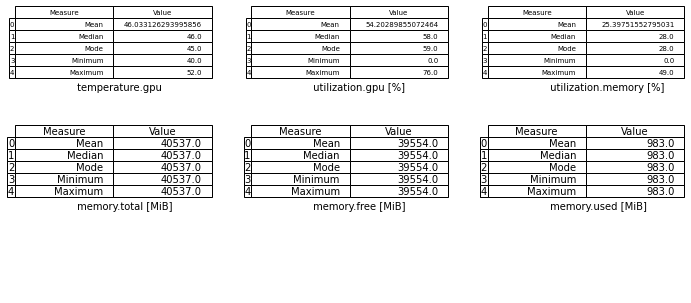

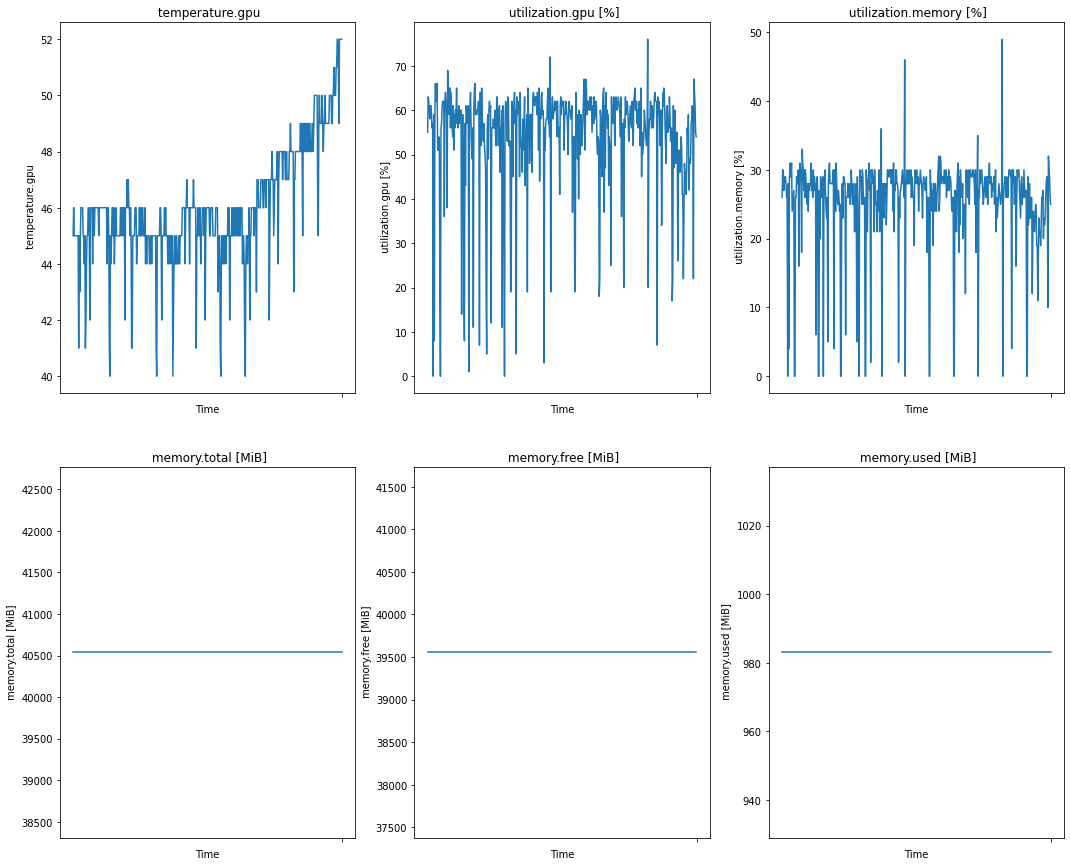

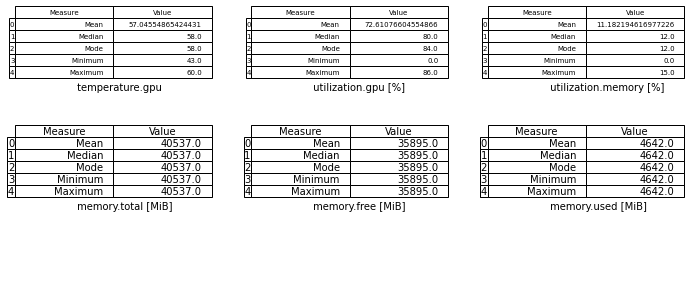

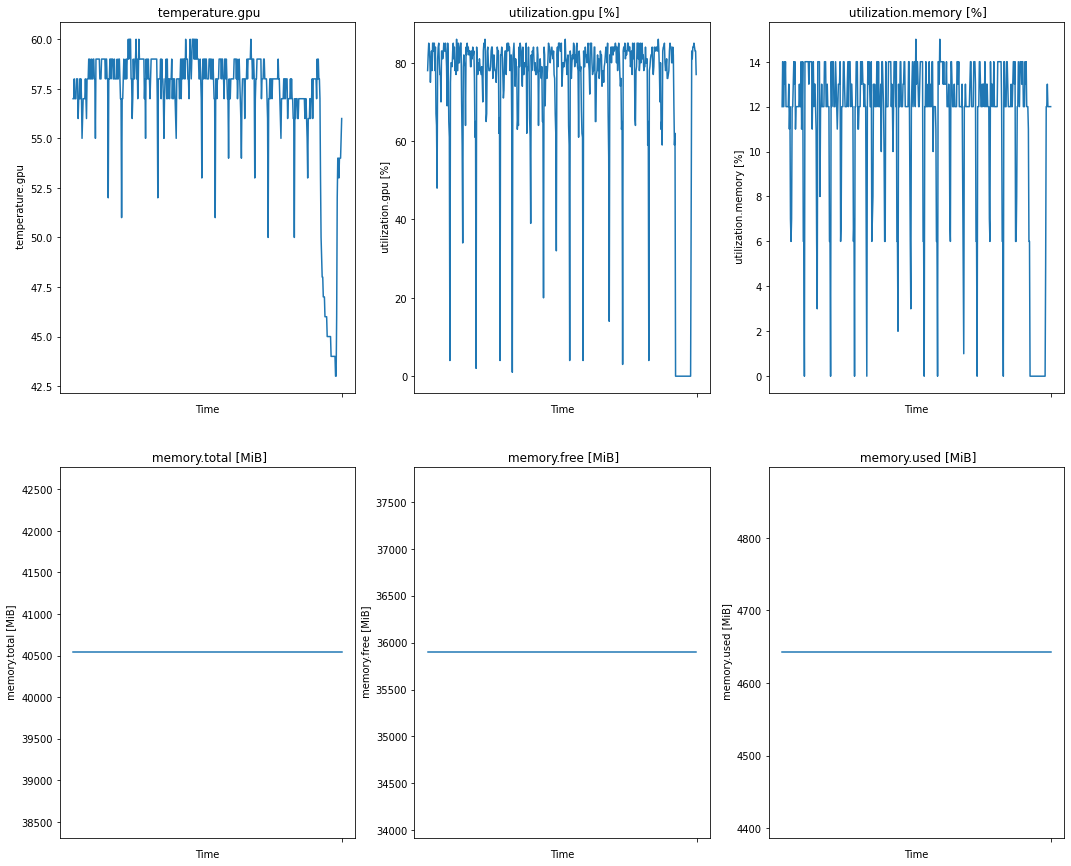

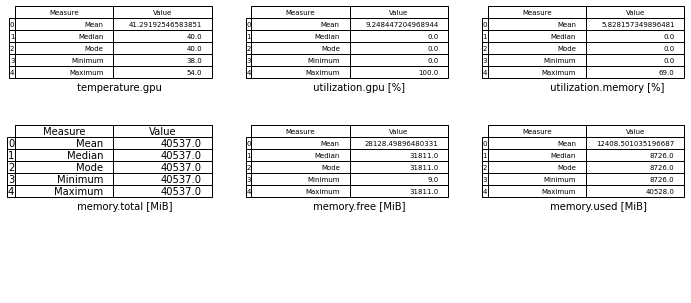

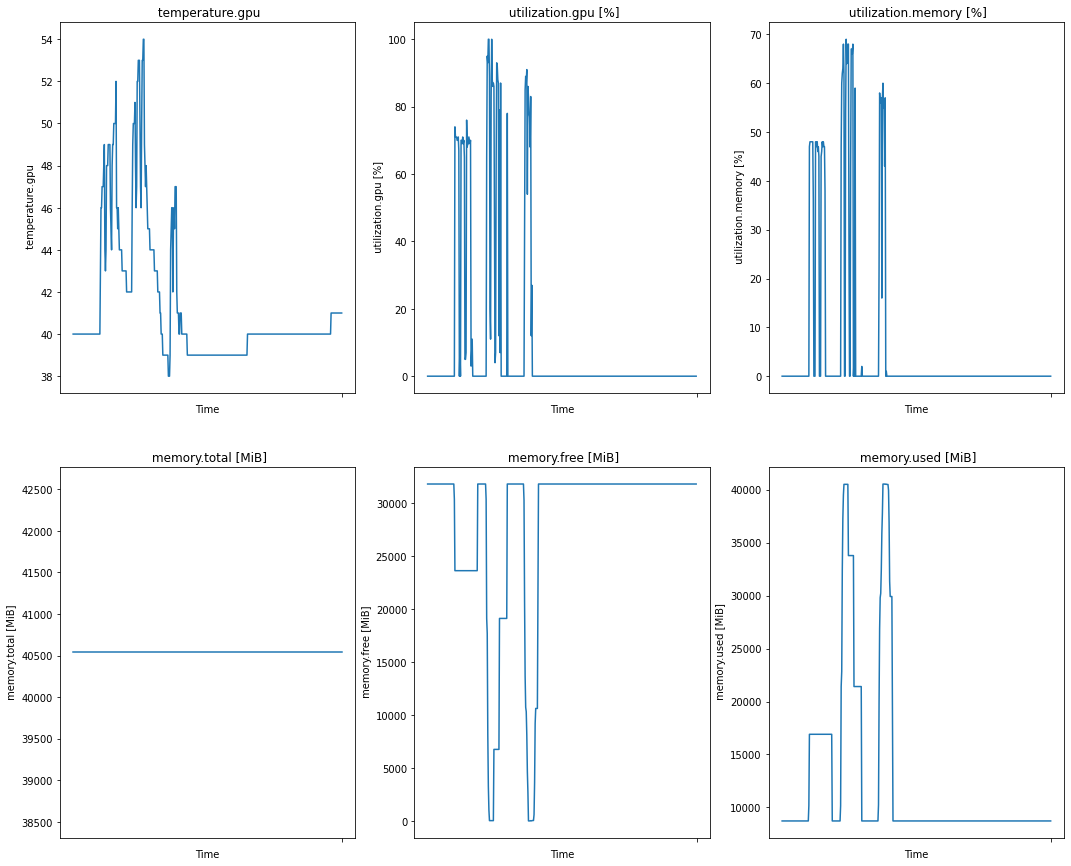

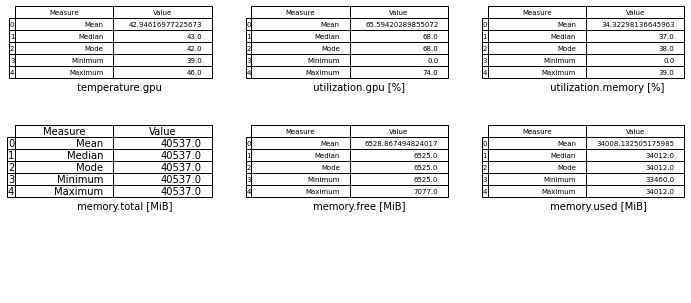

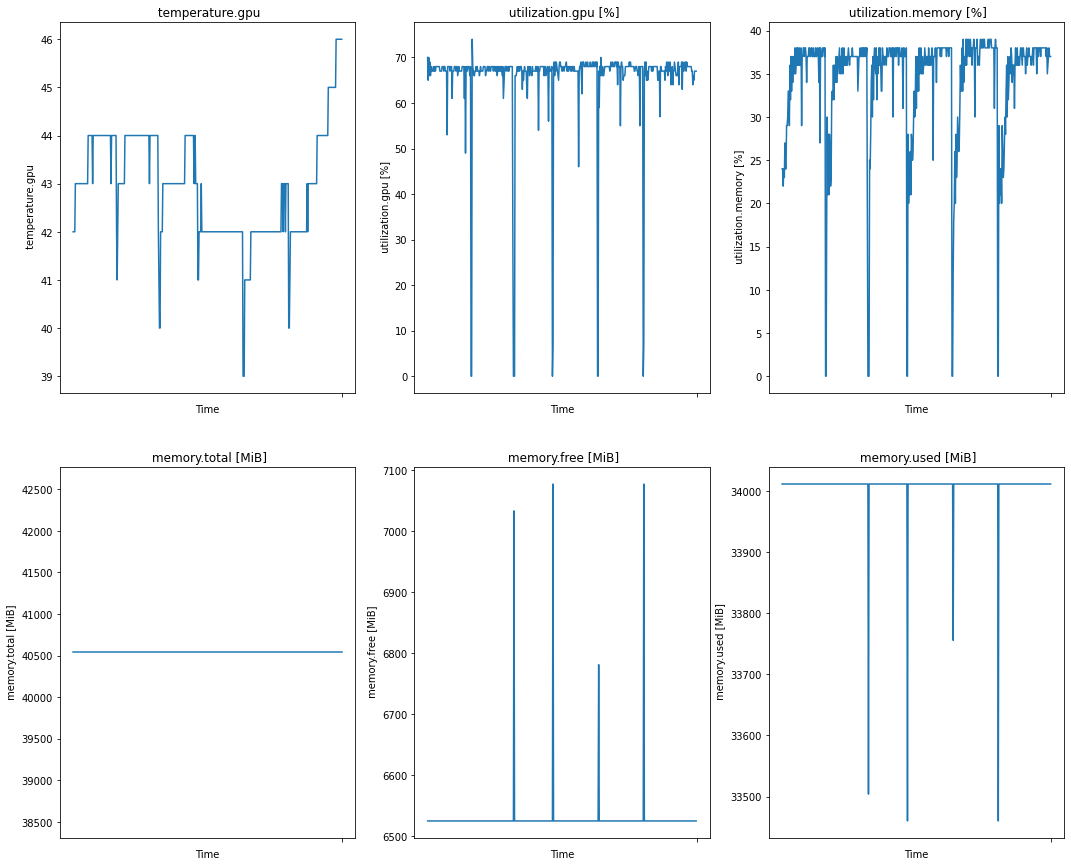

In [4]:
# Describe detailed info
describe_numeric_column(df, 8)

## Max-min

### Training

In [329]:
# Read file
df = pd.read_csv('log-gpu/rtx-gpu-10seconds.csv')

# Describe general info
describe_total(df, 2)


Jumlah data: 20
Jumlah atribut: 9


,temperature.gpu
count,20.000000
mean,76.750000
std,3.354102
min,73.000000
25%,73.750000
50%,77.000000
75%,80.000000
max,80.000000


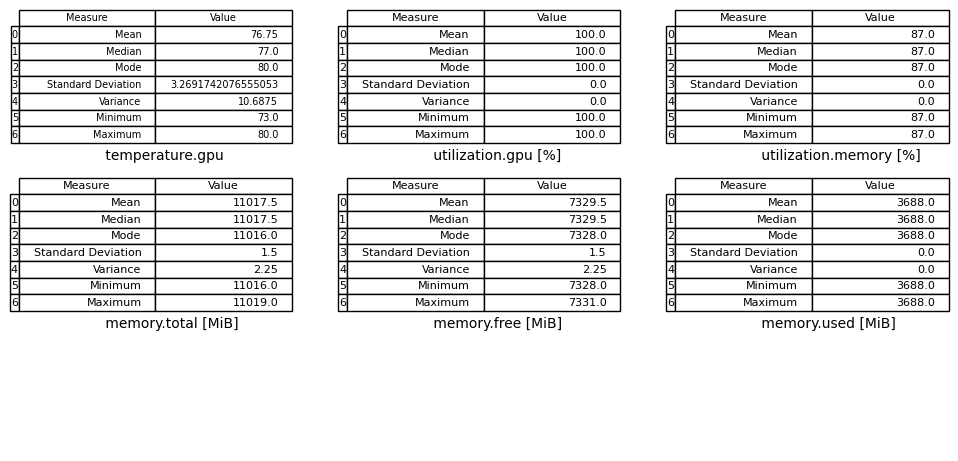

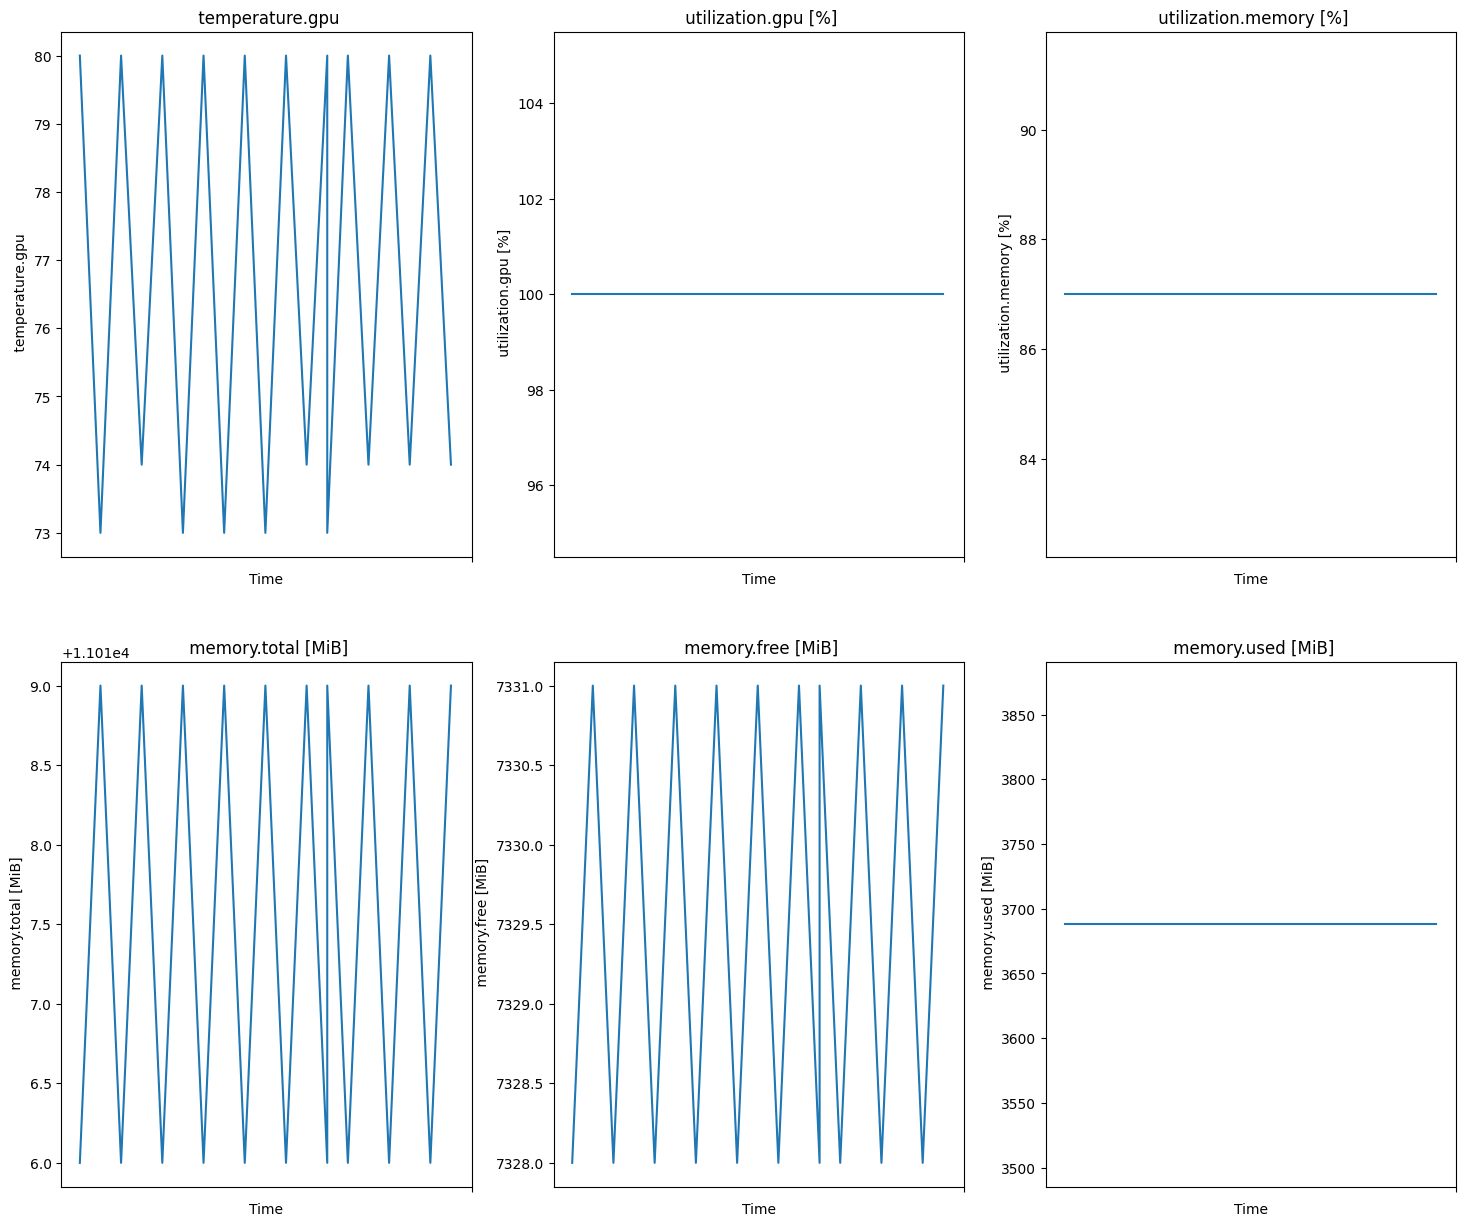

In [330]:
# Describe detailed info
describe_numeric_column(df, 2)

# Inference Load Testing (Burst)

## Load Testing

### Inference

In [ ]:
# Read file
df = pd.read_csv('log-gpu/rtx-gpu-10seconds.csv')

# Describe general info
describe_total(df, 2)


Jumlah data: 20
Jumlah atribut: 9


,temperature.gpu
count,20.000000
mean,76.750000
std,3.354102
min,73.000000
25%,73.750000
50%,77.000000
75%,80.000000
max,80.000000


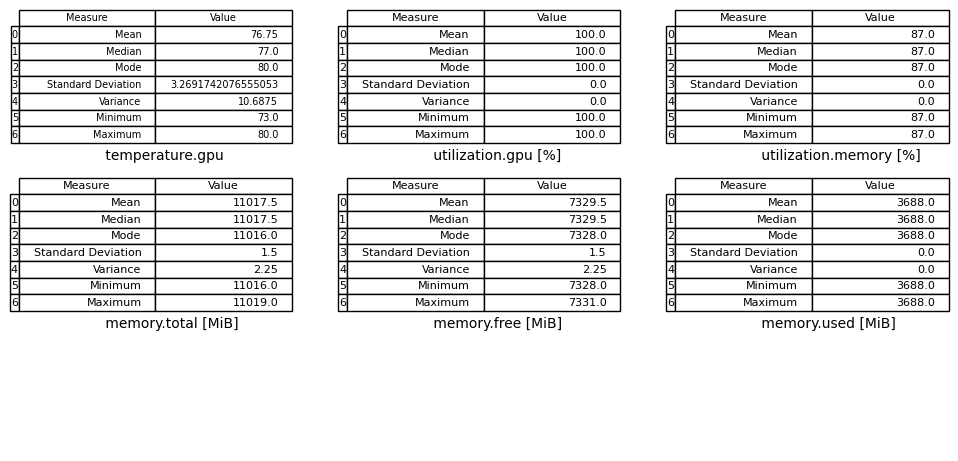

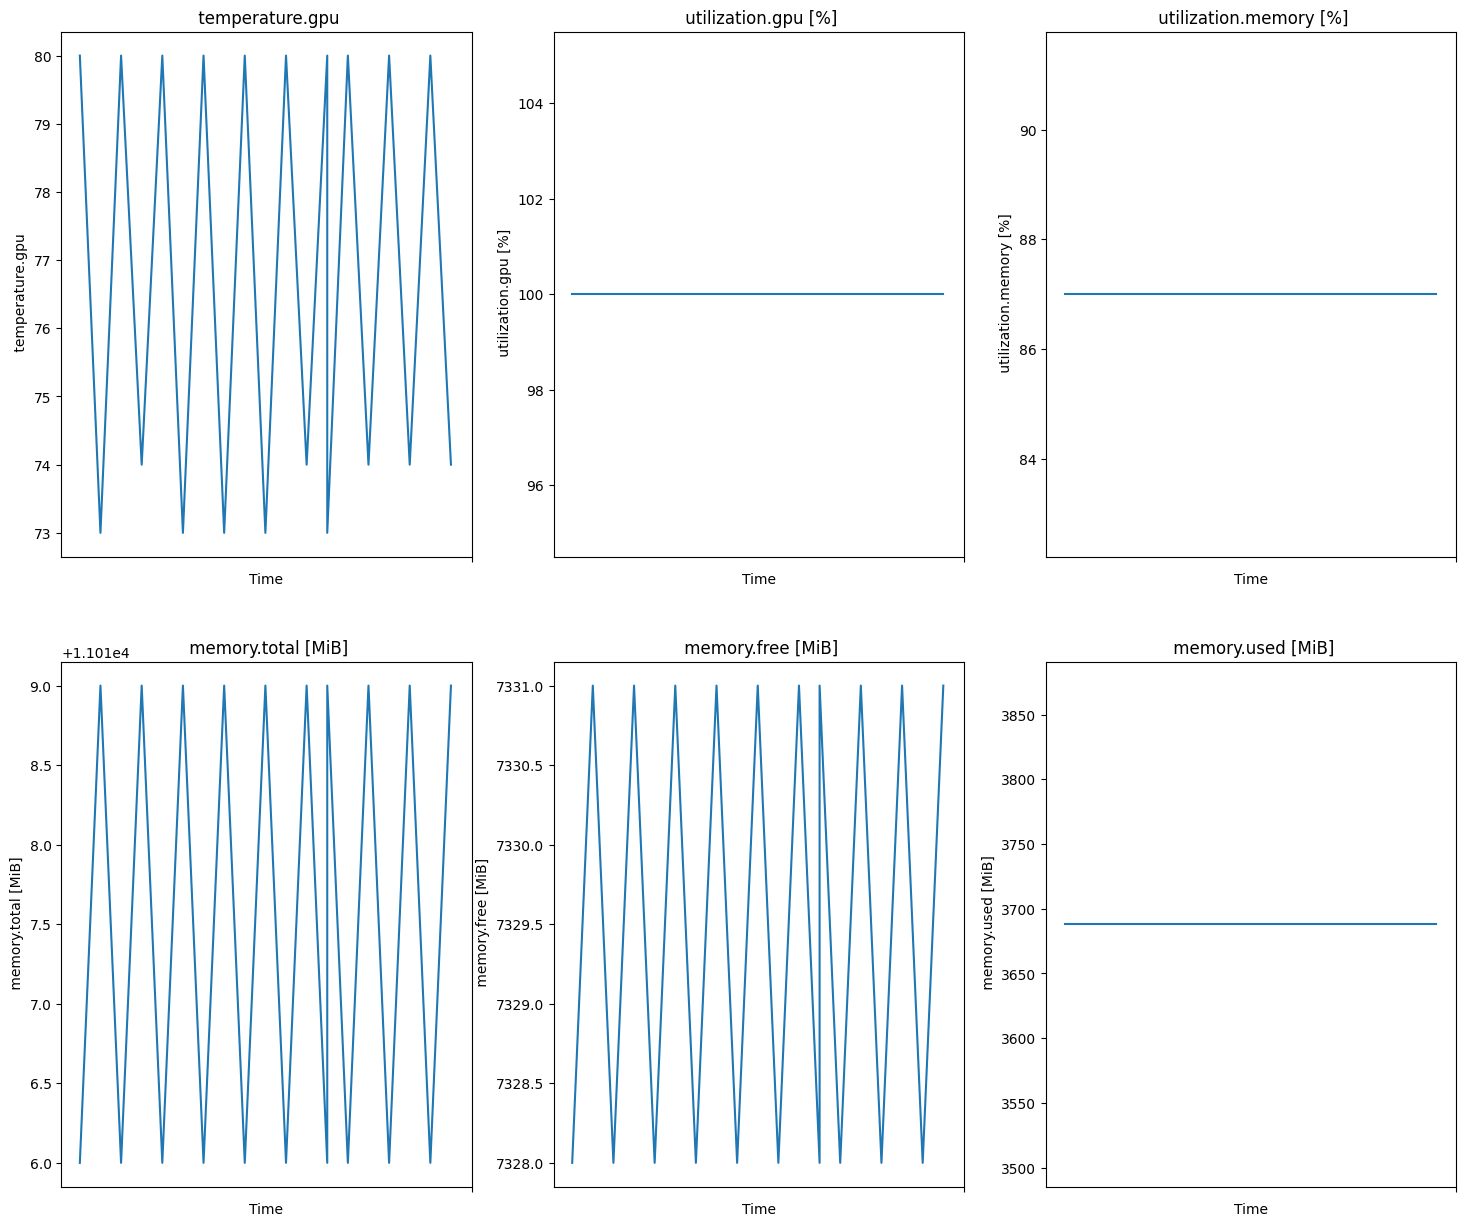

In [ ]:
# Describe detailed info
describe_numeric_column(df, 2)

### Training

In [ ]:
# Read file
df = pd.read_csv('log-gpu/rtx-gpu-10seconds.csv')

# Describe general info
describe_total(df, 2)


Jumlah data: 20
Jumlah atribut: 9


,temperature.gpu
count,20.000000
mean,76.750000
std,3.354102
min,73.000000
25%,73.750000
50%,77.000000
75%,80.000000
max,80.000000


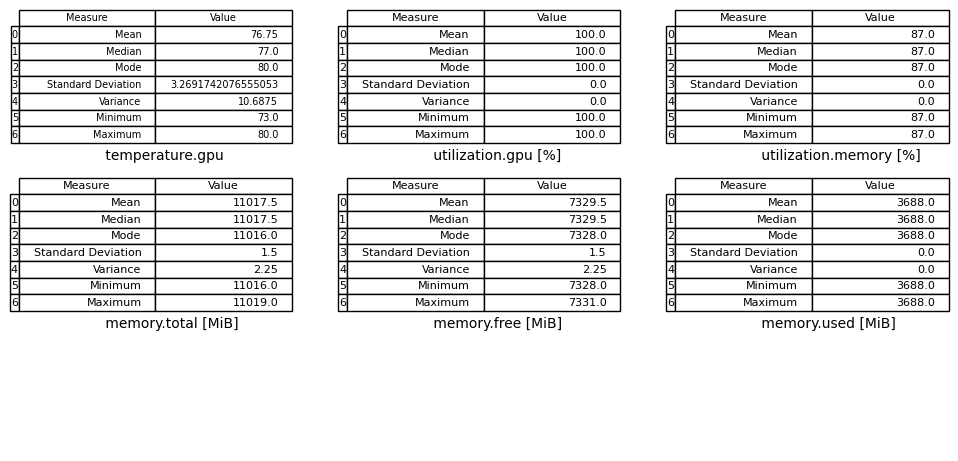

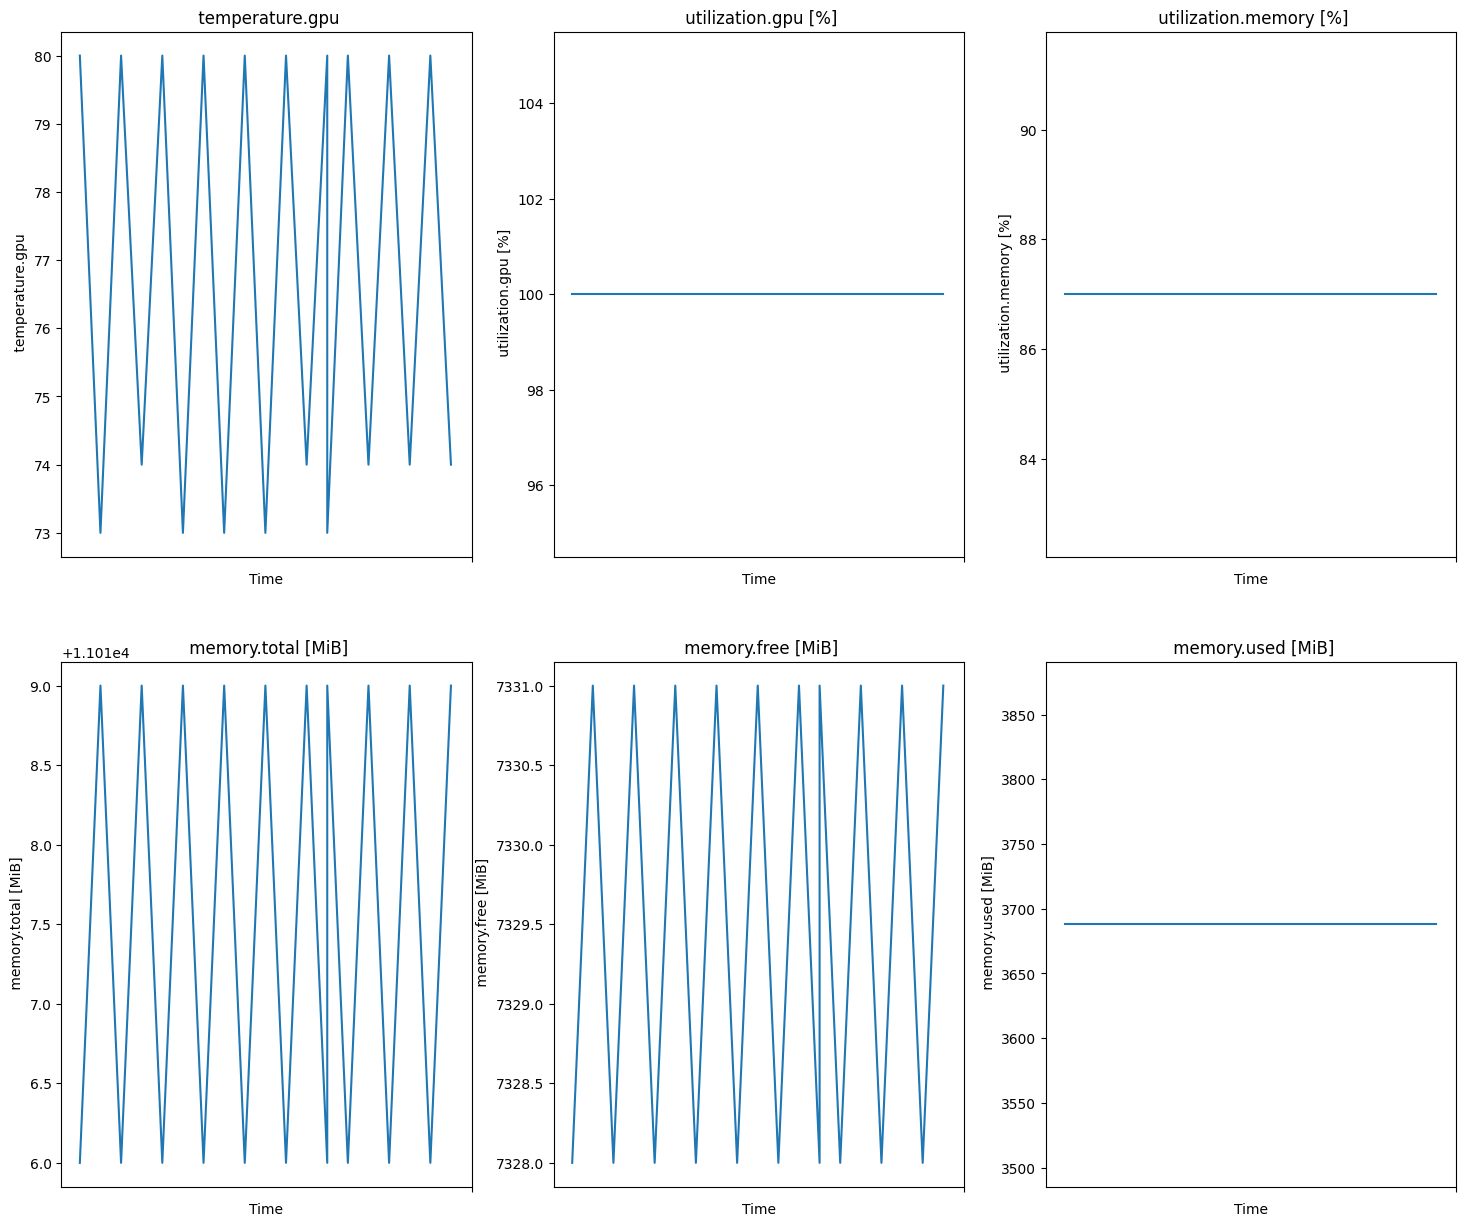

In [ ]:
# Describe detailed info
describe_numeric_column(df, 2)

# Chaos Engineering Run 1 (Linear)

## Load Testing

### Inference

In [339]:
# Read file
df = pd.read_csv('log-gpu/rtx-gpu-10seconds.csv')

# Describe general info
describe_total(df, 2)


Jumlah data: 20
Jumlah atribut: 9


,temperature.gpu
count,20.000000
mean,76.750000
std,3.354102
min,73.000000
25%,73.750000
50%,77.000000
75%,80.000000
max,80.000000


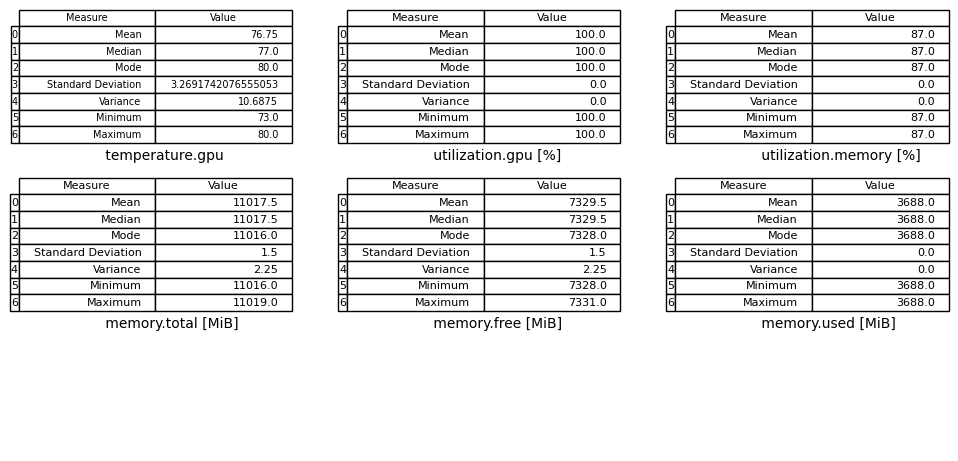

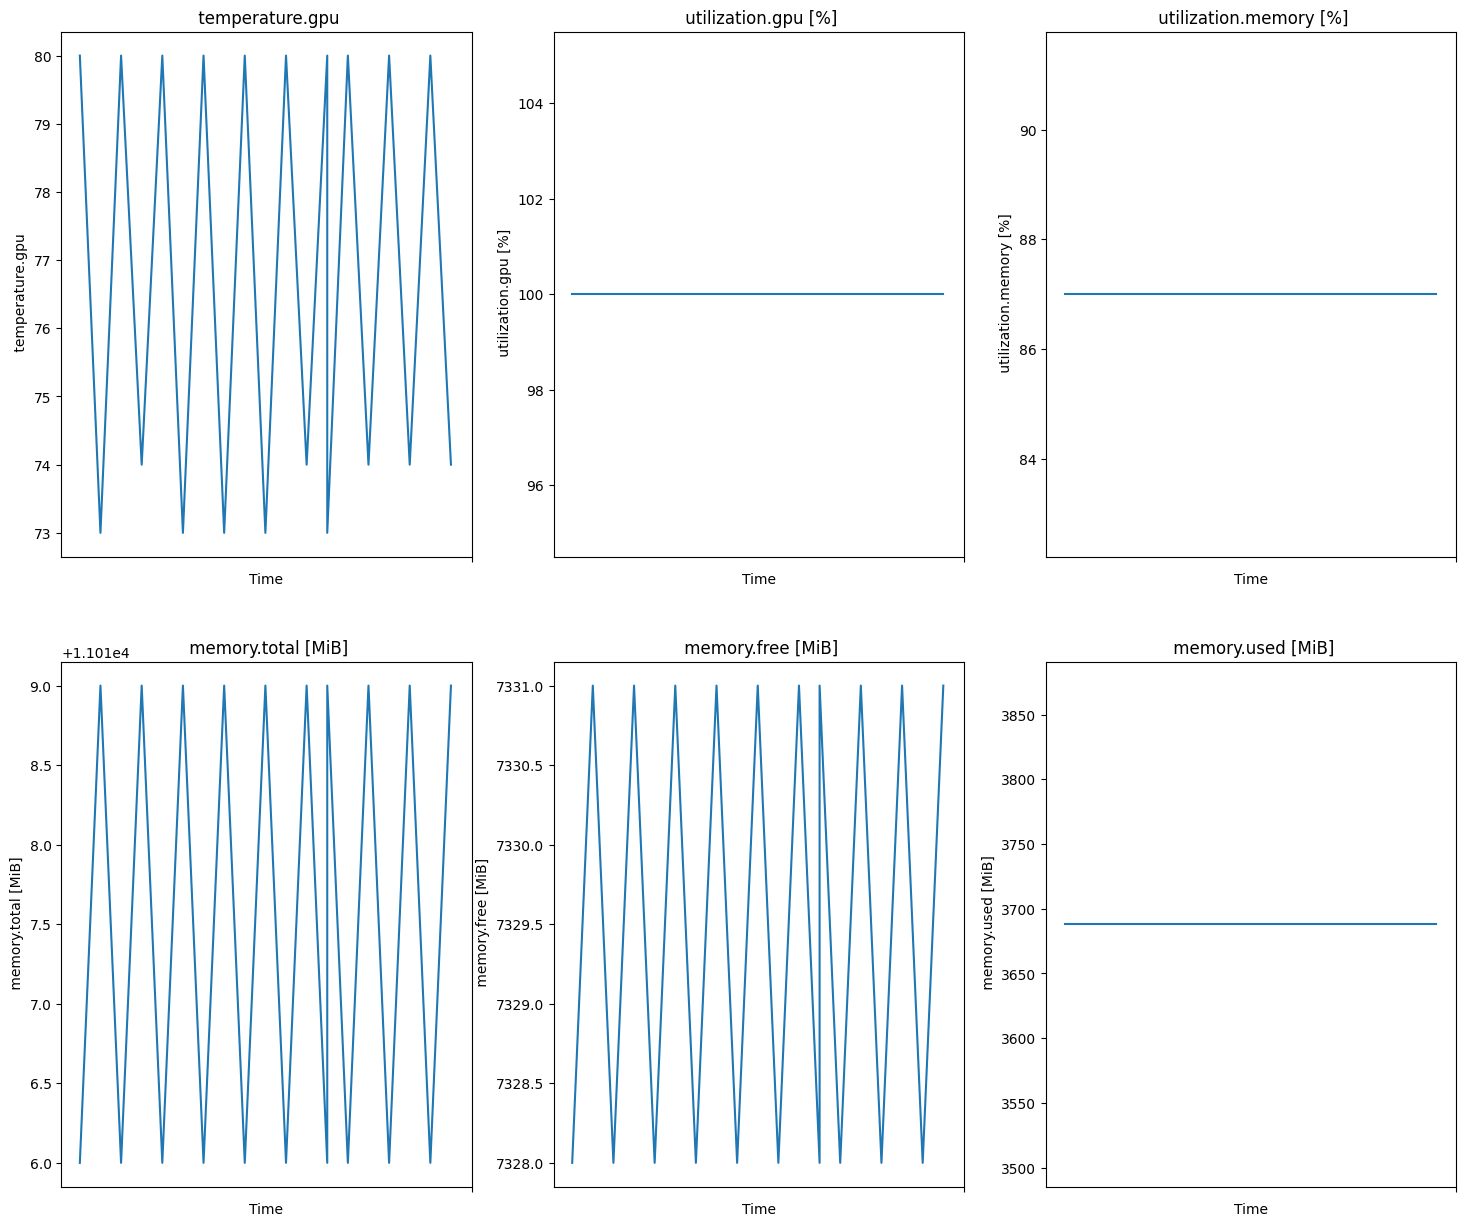

In [340]:
# Describe detailed info
describe_numeric_column(df, 2)

### Training

In [341]:
# Read file
df = pd.read_csv('log-gpu/rtx-gpu-10seconds.csv')

# Describe general info
describe_total(df, 2)


Jumlah data: 20
Jumlah atribut: 9


,temperature.gpu
count,20.000000
mean,76.750000
std,3.354102
min,73.000000
25%,73.750000
50%,77.000000
75%,80.000000
max,80.000000


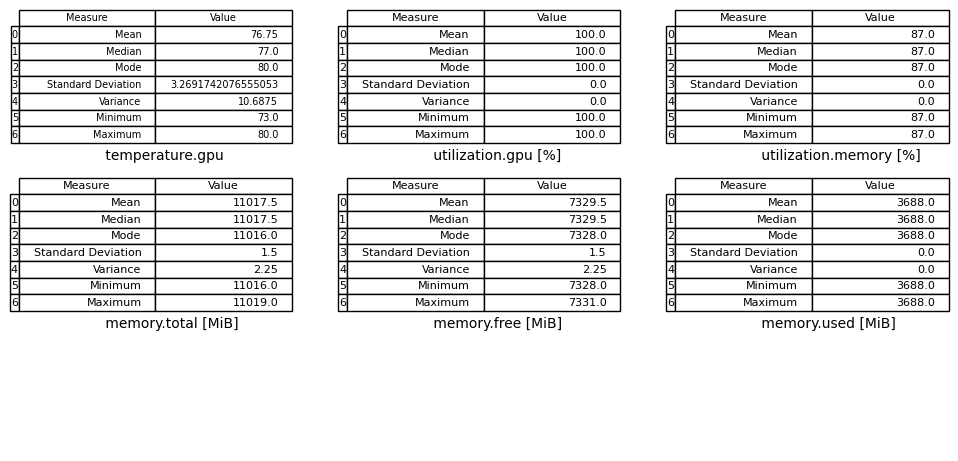

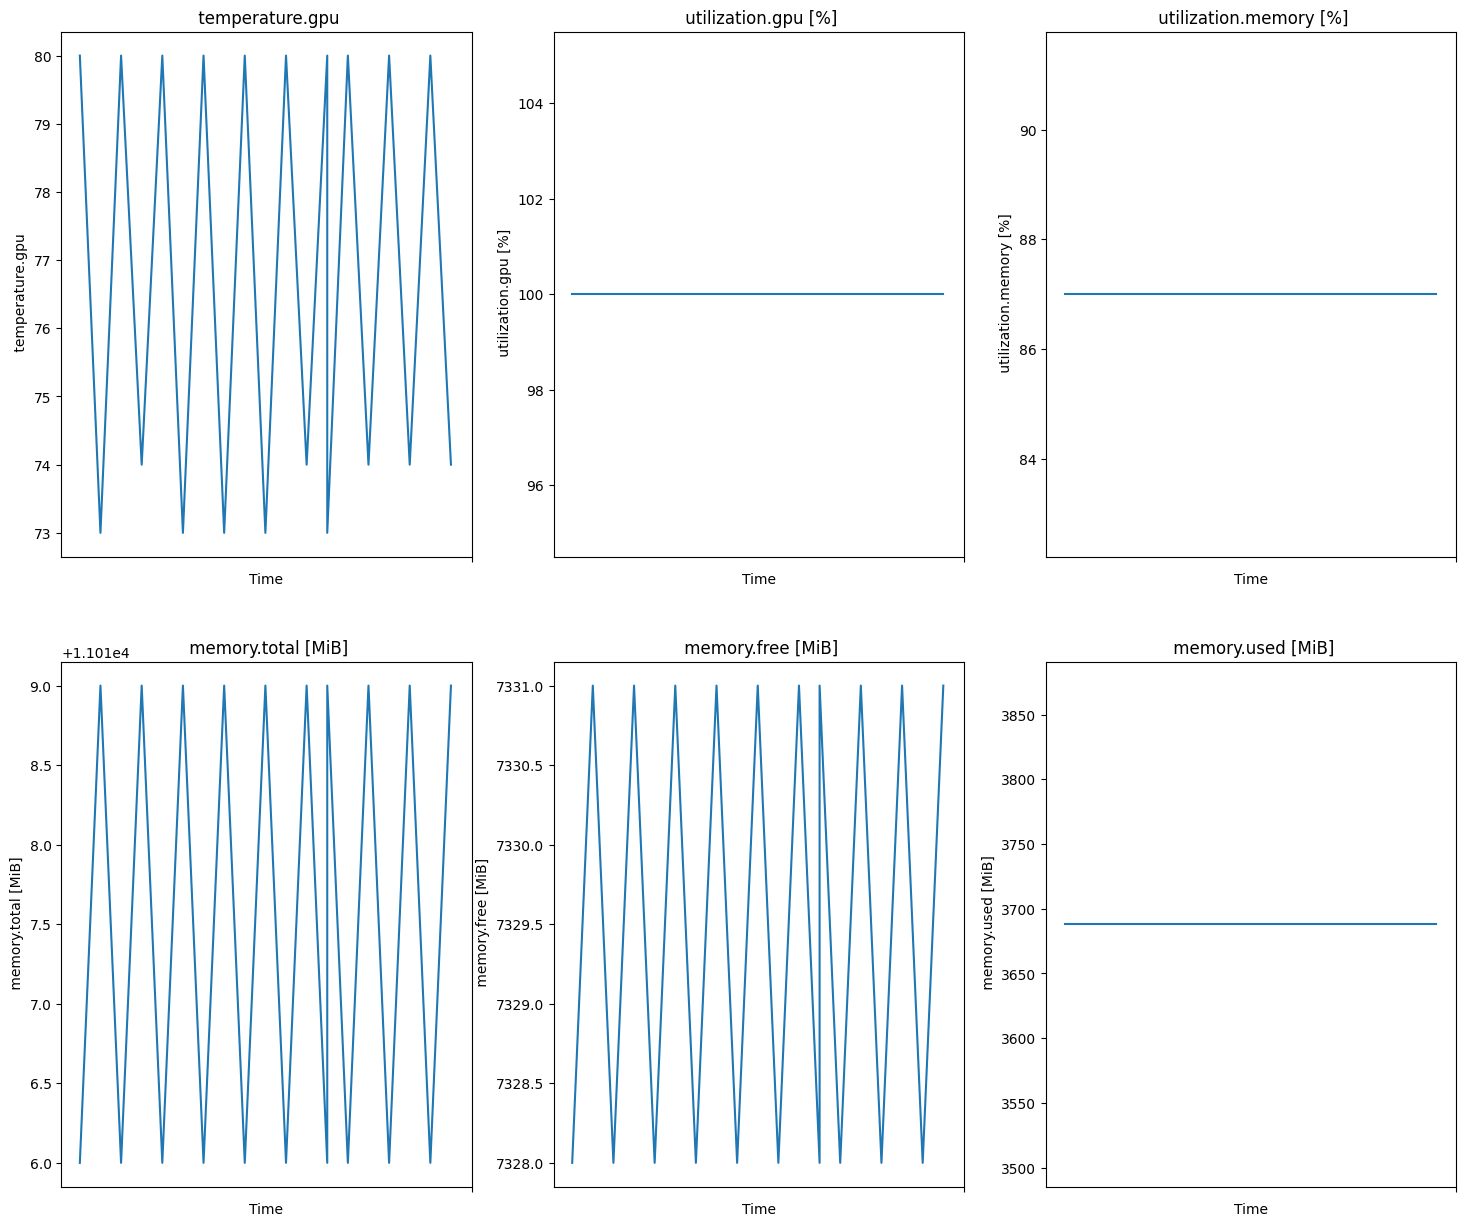

In [342]:
# Describe detailed info
describe_numeric_column(df, 2)

# Chaos Engineering Run 2 (Linear)

## Load Testing

### Inference

In [4]:
# Read file
df = pd.read_csv('log-gpu/rtx-gpu-10seconds.csv')

# Describe general info
describe_total(df, 2)


GPU:  0
Jumlah data: 10
Jumlah atribut: 9

GPU:  1
Jumlah data: 10
Jumlah atribut: 9



GPU:  0
(10, 9)

GPU:  1
(10, 9)



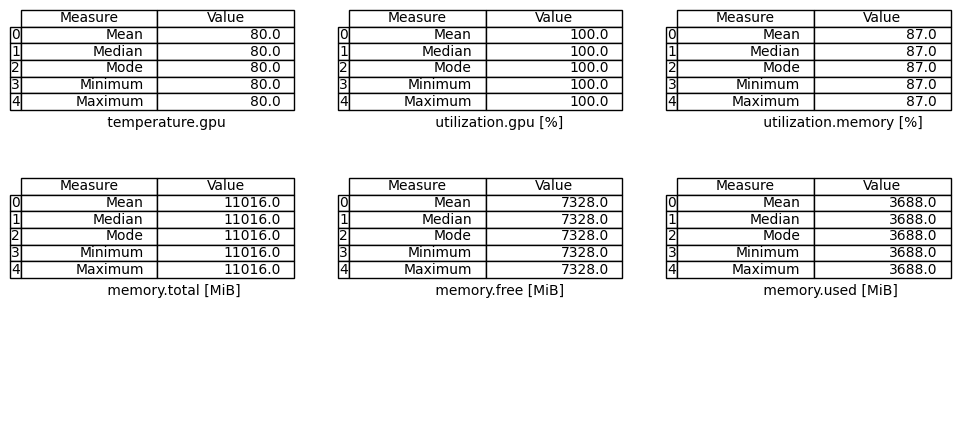

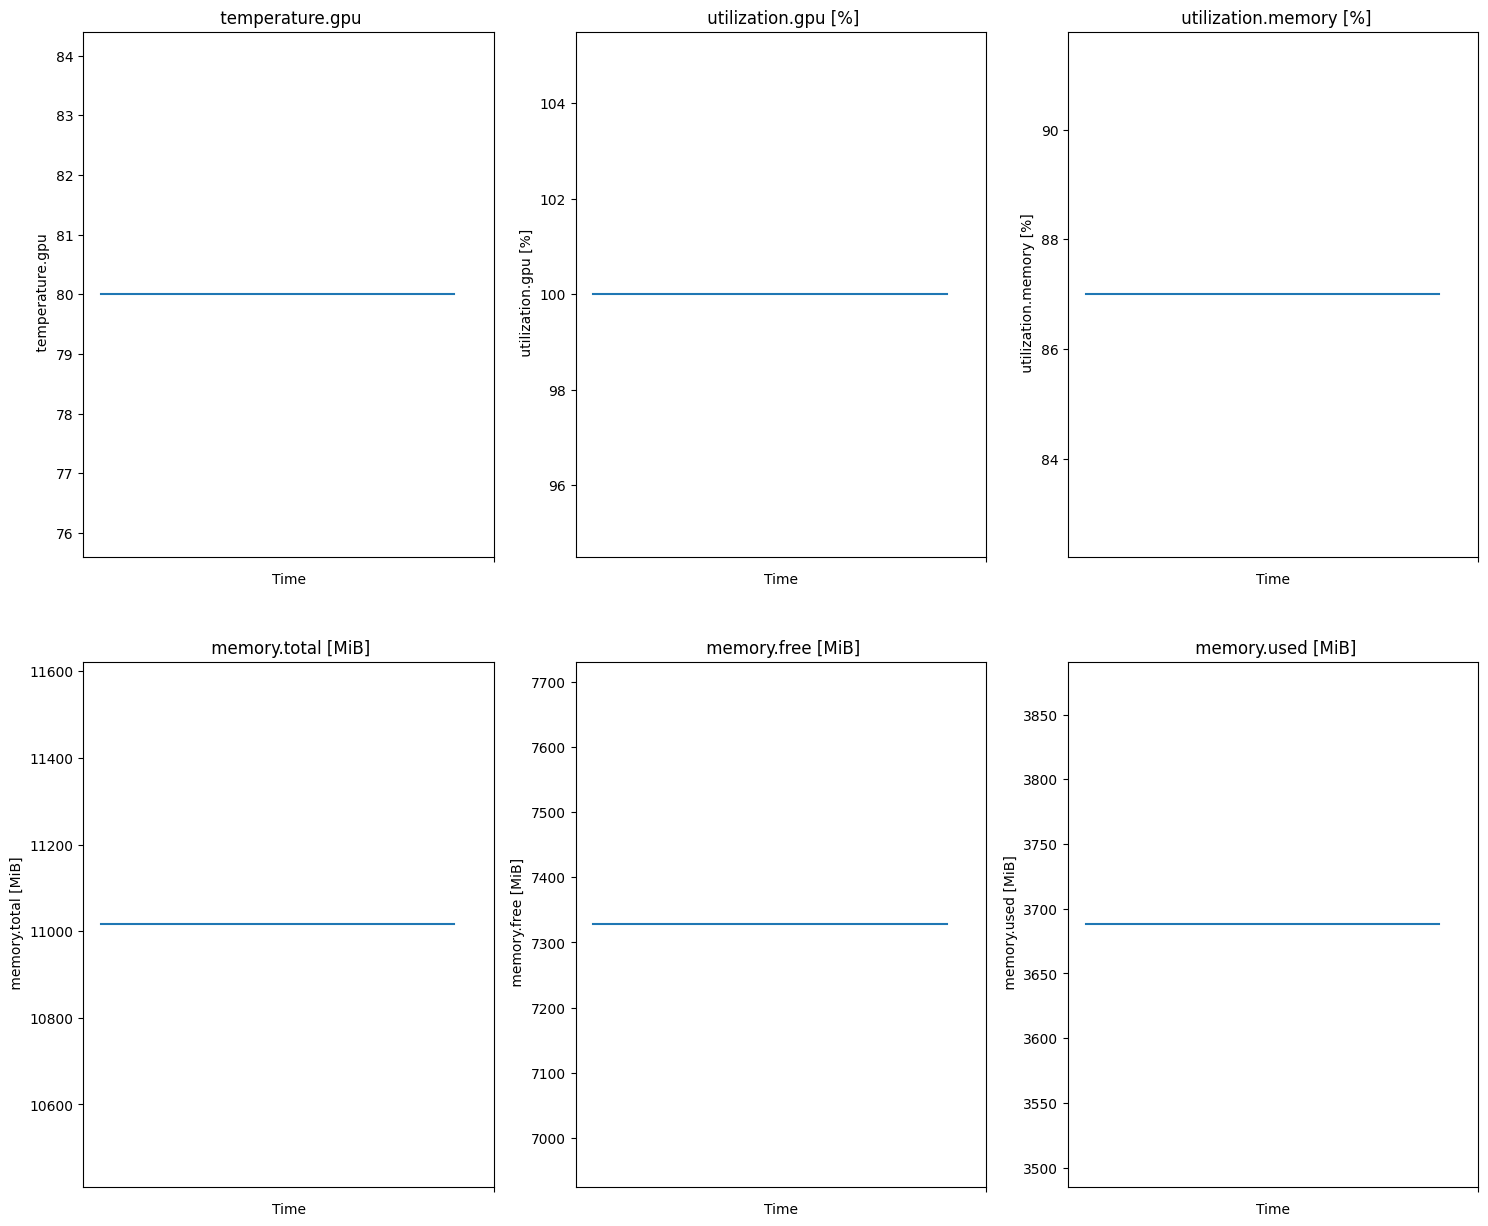

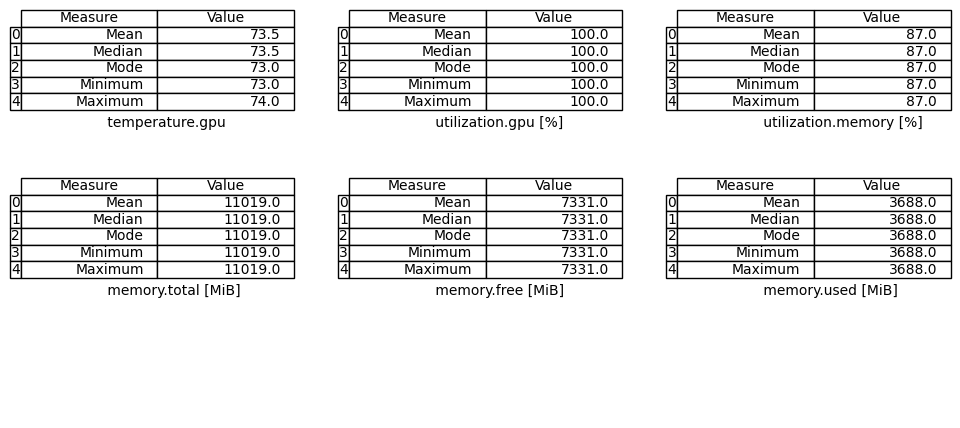

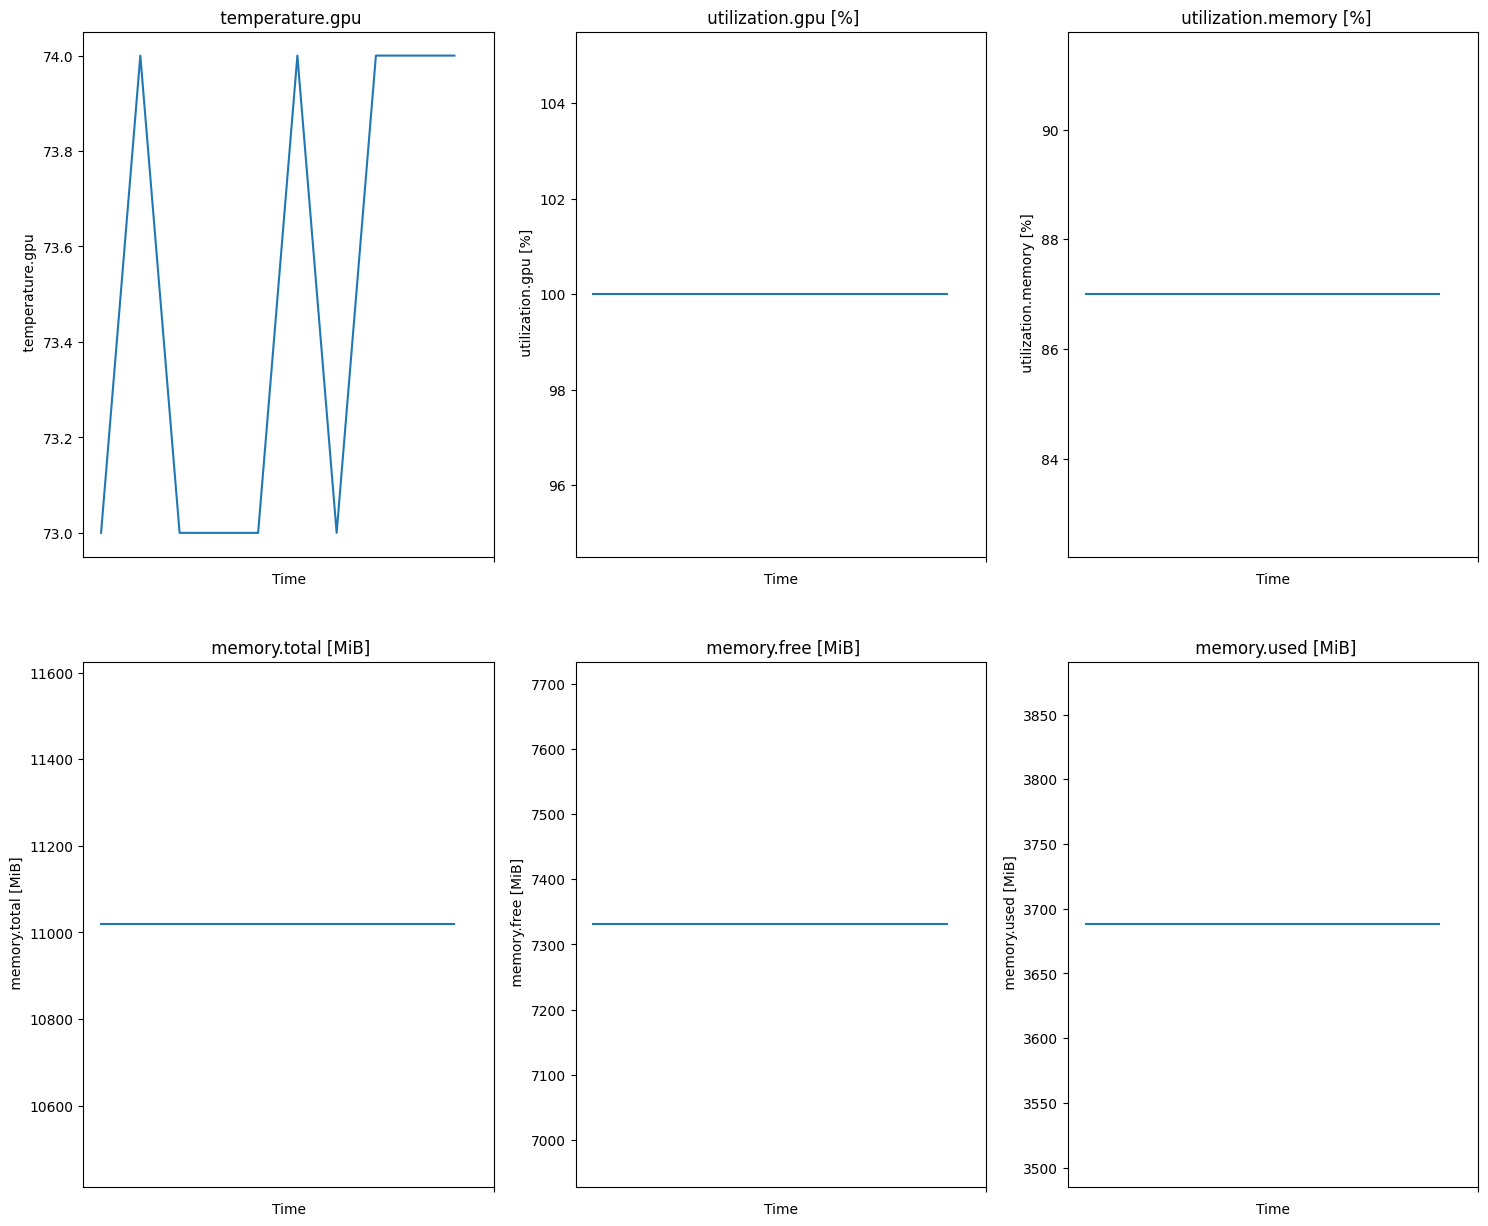

In [5]:
# Describe detailed info
describe_numeric_column(df, 2)

### Training

In [ ]:
# Read file
df = pd.read_csv('log-gpu/rtx-gpu-10seconds.csv')

# Describe general info
describe_total(df, 2)


Jumlah data: 20
Jumlah atribut: 9


,temperature.gpu
count,20.000000
mean,76.750000
std,3.354102
min,73.000000
25%,73.750000
50%,77.000000
75%,80.000000
max,80.000000


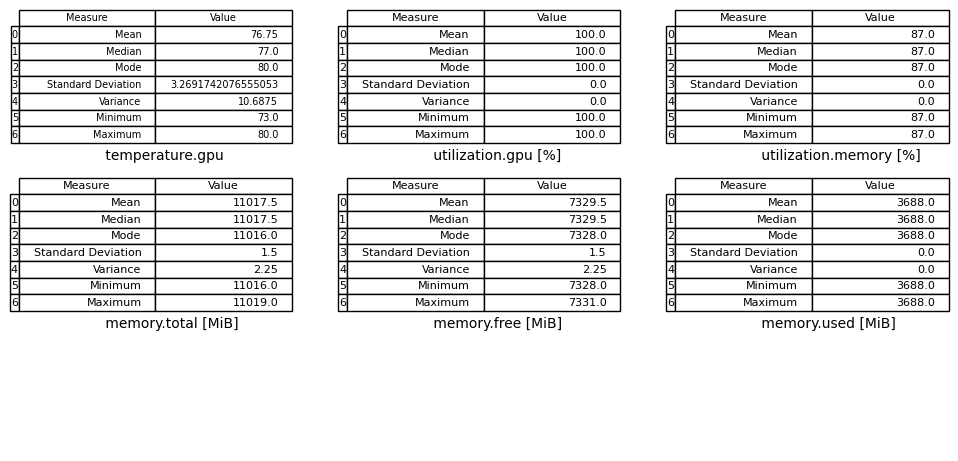

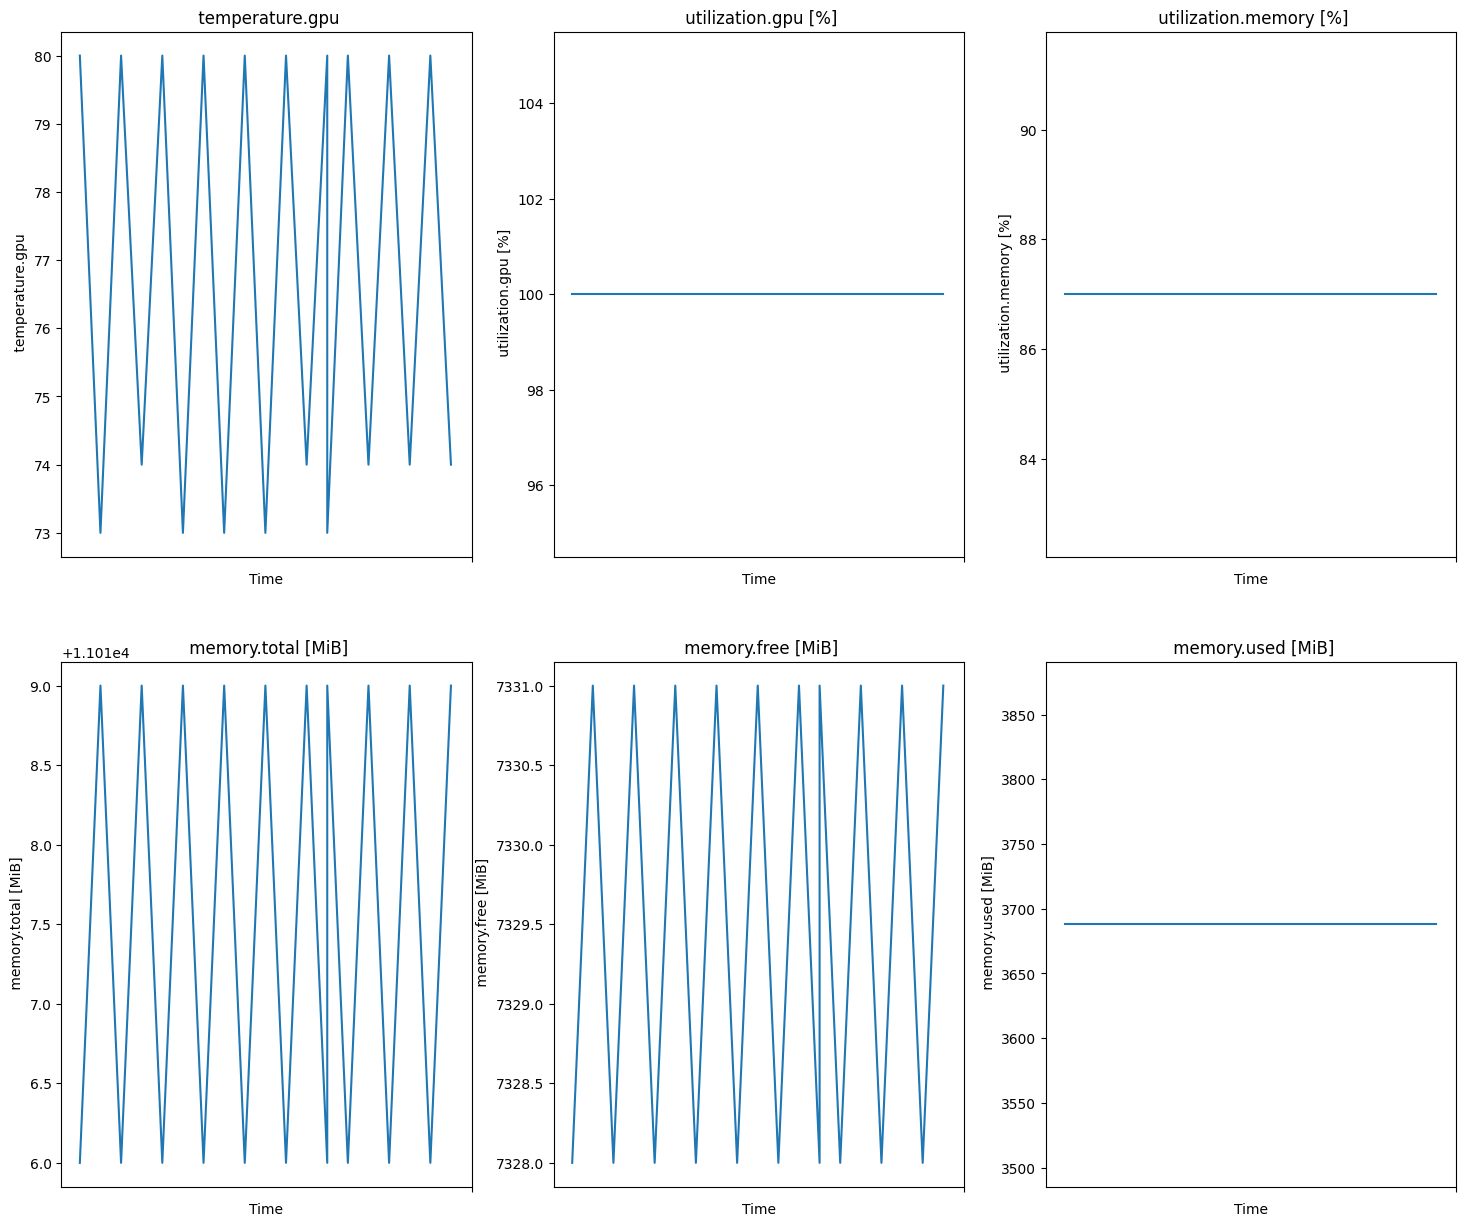

In [ ]:
# Describe detailed info
describe_numeric_column(df, 2)